In [66]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU
from tensorflow.keras.models import Model


In [67]:
# 입력 텐서 정의
input_tensor = Input(shape=(128, 128, 64))
  # 128x128 이미지 크기, 이전 64 채널 수(RGB 이미지)

In [68]:
# Depthwise Convolution
x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', depth_multiplier=1)(input_tensor)
# x = Conv2D(1,kernel_size=(3, 3), padding='same')(input_tensor)
  # 각 입력 채널에 대해 3x3 크기의 필터를 독립적으로 적용.
  # 필터 크기 3x3
  # padding='same': 패딩 추가 -> 입력과 출력의 크기를 동일하게 유지
  #############  depth_multiplier=1: 각 입력 채널에 대해 하나의 필터 적용

x = BatchNormalization()(x) # 배치 정규화
x = ReLU()(x)


In [69]:
# Pointwise Convolution
x = Conv2D(filters=16, kernel_size=(1, 1), padding='same')(x)
# 출력 채널 수 32로 줄이기

x = BatchNormalization()(x)
x = ReLU()(x)

In [70]:
# 모델 정의
model = Model(inputs=input_tensor, outputs=x)
  # 입력 텐서와 출력 텐서를 사용하여 모델 정의

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 128, 64)]    0         
                                                                 
 depthwise_conv2d_7 (Depthwi  (None, 128, 128, 64)     640       
 seConv2D)                                                       
                                                                 
 batch_normalization_21 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_21 (ReLU)             (None, 128, 128, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 16)      1040      
                                                                 
 batch_normalization_22 (Bat  (None, 128, 128, 16)     64 

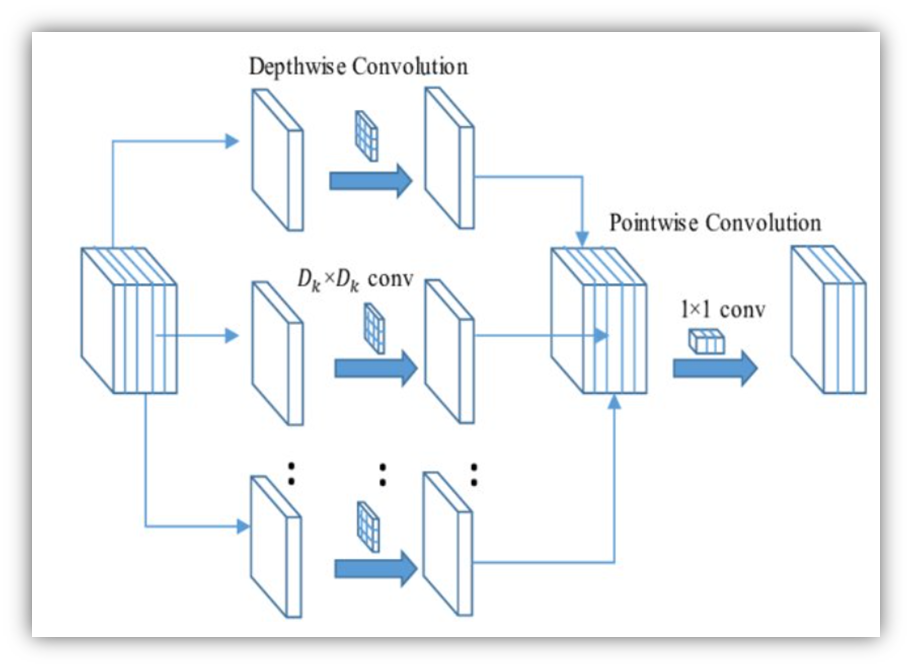

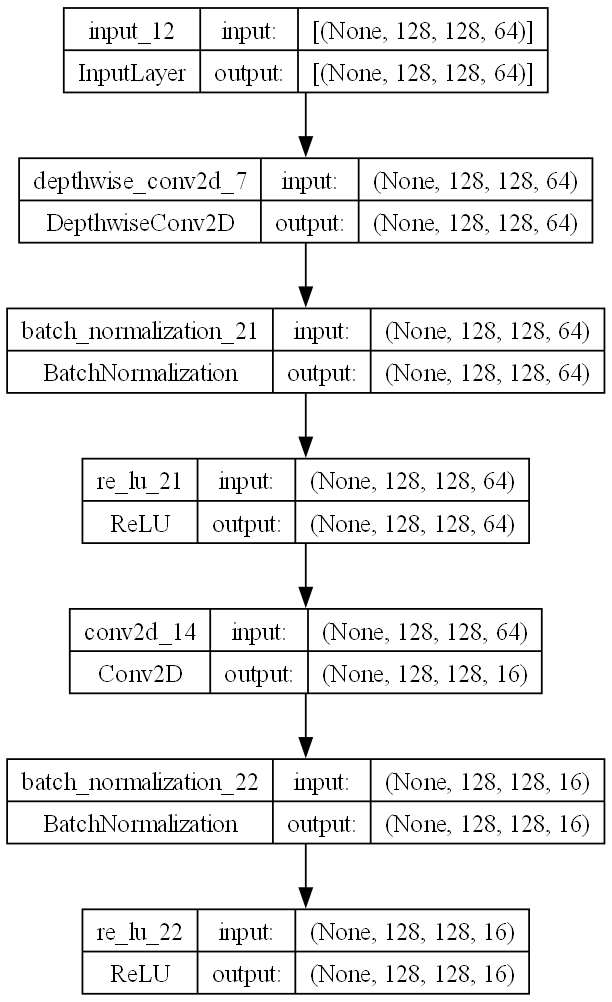

In [71]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True,
    rankdir="TB", expand_nested=False, dpi=128,
    show_layer_activations=False,)